# Анализ и предобработка данных «Карта ДТП» для последующего использования в исследовании. Исследовательский анализ

- Автор:Мусабаева Алеся Талгатовна
- Дата: 28.11.2024


# Кейс спринта


Заказчик проекта — «Карта ДТП». Это некоммерческий проект, посвящённый проблеме дорожно-транспортных происшествий в России. Цель проекта — повысить безопасность на дорогах.

«Карта ДТП» помогает выявлять реальные причины ДТП, оценивать уровень развития инфраструктуры, а также разрабатывать качественные решения и программы по повышению безопасности на улицах и дорогах. Заказчик хочет собирать данные более высокого качества и ожидает от вас рекомендаций: на какие проблемы или особенности обратить внимание.

## Что нужно сделать

Вам необходимо проверить, встречаются ли в данных дубликаты и пропуски. Это поможет заказчикам собирать более качественные данные.

Вам также понадобится ответить на следующие вопросы:

- как менялось число ДТП по временным промежуткам;

- различается ли число ДТП для групп водителей с разным стажем.


## Описание данных

Данные `Kirovskaya_oblast.csv`, `Moscowskaya_oblast.csv` содержат информацию ДТП:

* `geometry.coordinates` — координаты ДТП;

* `id` — идентификатор ДТП;

*  `properties.tags` — тег происшествия;

*  `properties.light` — освещённость;

*  `properties.point.lat` — широта;

*  `properties.point.long` — долгота;

*  `properties.nearby` — ближайшие объекты;

*  `properties.region` — регион;

*  `properties.scheme` — схема ДТП;

*  `properties.address` — ближайший адрес;

*  `properties.weather` — погода;

*  `properties.category` — категория ДТП;

*  `properties.datetime` — дата и время ДТП;

*  `properties.injured_count` — число пострадавших;

*  `properties.parent_region` — область;

*  `properties.road_conditions` — состояние покрытия;

*  `properties.participants_count` — число участников;

*  `properties.participant_categories` — категории участников.

`Moscowskaya_oblast_participiants.csv`, `Kirovskaya_oblast_participiants.csv` — сведения об участниках ДТП:

* `role` — роль;

* `gender` — пол;

* `violations` — какие правила дорожного движения были нарушены конкретным участником;

* `health_status` — состояние здоровья после  ДТП;

* `years_of_driving_experience` — число лет опыта;

* `id` — идентификатор ДТП.


`Kirovskaya_oblast_vehicles.csv`, `Moscowskaya_oblast_vehicles.csv` — сведения о транспортных средствах:

* `year` — год выпуска;

* `brand` — марка транспортного средства;

* `color` — цвет;

* `model` — модель;

* `category` — категория;

* `id` — идентификатор ДТП.

## Содержимое проекта
<font color='#7030a0'> Основные шаги проекта: 
- Замена названий (меток) столбцов на оптимальные для работы;
- Проверка ошибок в данных и их предоработка;
- Проверка на наличие явных и неявных дубликатов в данных;
- Проверка корректности типов
- Исследовательский анализ    
</font>   

##  Проверка ошибок в данных и их предобработка



In [1]:
#Подключаем библиотеку pandas
import pandas as pd

In [2]:
#Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install phik

In [3]:
# Загрузим библиотеку для расчета коэффициента корреляции
from phik import phik_matrix

In [4]:
#Загружаем данные в датафрейм
df=pd.read_csv('/datasets/Kirovskaya_oblast.csv')

In [5]:
#Отображение первых пяти строк и их наименований
display(df.head())

,geometry.coordinates,id,properties.tags,properties.light,properties.point.lat,properties.point.long,properties.nearby,properties.region,properties.scheme,properties.address,properties.weather,properties.category,properties.datetime,properties.injured_count,properties.parent_region,properties.road_conditions,properties.participants_count,properties.participant_categories
0,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.243790,47.875603,[],Яранский район,600.0,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,['Дождь'],Опрокидывание,2017-07-01 18:00:00,1,Кировская область,['Мокрое'],3,['Все участники']
1,"[47.87903, 57.304807]",2889433,Дорожно-транспортные происшествия,Светлое время суток,57.304807,47.879030,"['Административные здания', 'Нерегулируемый пе...",Яранский район,710.0,"г Яранск, ул Кирова, 10",['Ясно'],Наезд на пешехода,2023-09-12 17:10:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']"
2,"[47.840781, 57.297156]",2591208,Дорожно-транспортные происшествия,Сумерки,57.297156,47.840781,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,NaN,"г Яранск, ул Чапаева, 80",['Пасмурно'],Съезд с дороги,2021-07-02 21:25:00,1,Кировская область,['Мокрое'],1,['Все участники']
3,"[47.834365, 57.244775]",2577639,Дорожно-транспортные происшествия,Светлое время суток,57.244775,47.834365,['Жилые дома индивидуальной застройки'],Яранский район,200.0,"м Знаменка, ул Кирова, 15",['Пасмурно'],Столкновение,2021-05-31 18:55:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Мотоциклисты']"
4,"[47.968197, 57.357738]",1981026,Дорожно-транспортные происшествия,Светлое время суток,57.357738,47.968197,['Нерегулируемый перекрёсток неравнозначных ул...,Яранский район,NaN,"с/п Никольское, Киров-Советск- Яранск - подъез...",['Ясно'],Опрокидывание,2018-05-16 16:25:00,2,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники']


In [6]:
#Отображение общей информации по датафрейму
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   geometry.coordinates               14517 non-null  object 
 1   id                                 14517 non-null  int64  
 2   properties.tags                    14517 non-null  object 
 3   properties.light                   14517 non-null  object 
 4   properties.point.lat               14485 non-null  float64
 5   properties.point.long              14485 non-null  float64
 6   properties.nearby                  14517 non-null  object 
 7   properties.region                  14517 non-null  object 
 8   properties.scheme                  13380 non-null  float64
 9   properties.address                 13843 non-null  object 
 10  properties.weather                 14517 non-null  object 
 11  properties.category                14517 non-null  obj

<font color='#7030a0'> Промежуточные выводы: 
1. Датафрейм содержит 14517 записей и 4 столбца из них есть пропущенные значения:
- ` properties.point.lat ` и   properties.point.long (32 пропуска)
- ` propeddrties.scheme `(1137 пропуска)
- ` properties.address ` (674 пропуска)
Некорректные типы данных:
    -
  
</font>   

<font color='#7030a0'> Промежуточные выводы: Всего 14517 строк, пропуски содержатся в следующих стобцах:
- `properties.point.lat` (32)-широта и долгота не является очевидно обязательными столбцами, можно использовать координаты
- `properties.point.long` (32)-широта и долгота не является очевидно обязательными столбцами, можно использовать координаты
- `properties.scheme` (1137)-схема, надо заполнить значением загрушкой, так как не очевидно, случайно ли пропустили данные или это поле не является обязательным к заполнению
- `properties.address`(674). -адрес, надо заполнить значением загрушкой, так как не очевидно, слуяайно ли пропустили данные или это поле не является обязательным к заполнению
</font>     

### Замена названий (меток) столбцов на оптимальные для работы

In [7]:
df.columns = df.columns.str.replace('properties.', '', regex=True)
df.columns = df.columns.str.replace('.', '_', regex=True)
print(df.columns)

Index(['geometry_coordinates', 'id', 'tags', 'light', 'point_lat',
       'point_long', 'nearby', 'region', 'scheme', 'address', 'weather',
       'category', 'datetime', 'injured_count', 'parent_region',
       'road_conditions', 'participants_count', 'participant_categories'],
      dtype='object')


<font color='#7030a0'> Промежуточные выводы: Наименования приведены к более удобному формату
</font>  

### Проверка пропусков в данных

На примере датасета `Kirovskaya_oblast.csv` изучите, в каких столбцах есть пропуски. Предположите причины их возникновения. Напишите рекомендации, как работать с  пропусками и как их в дальнейшем избежать.

In [8]:
#Находим долю пропущенных данных
round(df.isna().sum()/len(df)*100,0)


geometry_coordinates      0.0
id                        0.0
tags                      0.0
light                     0.0
point_lat                 0.0
point_long                0.0
nearby                    0.0
region                    0.0
scheme                    8.0
address                   5.0
weather                   0.0
category                  0.0
datetime                  0.0
injured_count             0.0
parent_region             0.0
road_conditions           0.0
participants_count        0.0
participant_categories    0.0
dtype: float64

In [9]:

# Условие для NaN или пустых строк
empty_address_df = df[df['address'].isna() | (df['address'] == '')]
display(empty_address_df.head())

,geometry_coordinates,id,tags,light,point_lat,point_long,nearby,region,scheme,address,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories
18,"[47.703667, 57.398549]",1981028,Дорожно-транспортные происшествия,"В темное время суток, освещение отсутствует",57.398549,47.703667,[],Яранский район,820.0,NaN,['Пасмурно'],Наезд на пешехода,2018-05-01 22:10:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Пешеходы']"
59,"[47.969474, 57.105731]",2875566,Дорожно-транспортные происшествия,Светлое время суток,57.105731,47.969474,[],Яранский район,950.0,NaN,['Ясно'],Опрокидывание,2023-08-13 16:20:00,1,Кировская область,['Сухое'],1,['Все участники']
63,"[47.891099, 57.309193]",2875597,Дорожно-транспортные происшествия,Светлое время суток,57.309193,47.891099,"['Многоквартирные жилые дома', 'Внутридворовая...",Яранский район,410.0,NaN,['Ясно'],Столкновение,2023-08-01 12:35:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Мотоциклисты']"
95,"[47.906871, 57.020891]",2861063,Дорожно-транспортные происшествия,Светлое время суток,57.020891,47.906871,[],Яранский район,600.0,NaN,['Пасмурно'],Съезд с дороги,2023-07-22 03:50:00,3,Кировская область,['Мокрое'],3,['Все участники']
130,"[47.828239, 57.298419]",1984517,Дорожно-транспортные происшествия,Светлое время суток,57.298419,47.828239,"['АЗС', 'Автостоянка (отделенная от проезжей ч...",Яранский район,830.0,NaN,['Ясно'],Наезд на пешехода,2020-06-25 08:50:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Пешеходы']"


<font color='#7030a0'> Промежуточные выводы:
1. Столбец: `geometry_coordinates`, Тип данных: object. Оюъединенные даные со столбцов `point_lat` и `point_long`. Рекомендация удалить;
2. Столбец: `datetime`, Тип данных: object. Перевести в формат даты и время
3. Проверка оптимизация форматов для `id`,`point_lat`, `point_long`, `scheme`, `injured_count`,`participants_count`
</font>  

Промежуточные выводы:
1. Столбец: `geometry_coordinates`, Тип данных: object. Оюъединенные даные со столбцов `point_lat` и `point_long`. Рекомендация удалить;
2. Столбец: `datetime`, Тип данных: object. Перевести в формат даты и время
3. Проверка оптимизация форматов для `id`,`point_lat`, `point_long`, `scheme`, `injured_count`,`participants_count`

### Наличие явных и неявных дубликатов в данных



Есть ли явные дубликаты в данных, какой это процент значений?

In [10]:
sum_dublicates=df.duplicated().sum()
display(f'Количество дубликатов: {sum_dublicates}') 

'Количество дубликатов: 0'

In [11]:
df.columns

Index(['geometry_coordinates', 'id', 'tags', 'light', 'point_lat',
       'point_long', 'nearby', 'region', 'scheme', 'address', 'weather',
       'category', 'datetime', 'injured_count', 'parent_region',
       'road_conditions', 'participants_count', 'participant_categories'],
      dtype='object')

In [12]:
df_columns=df[['id', 'tags', 'light', 'nearby', 'region', 'weather', 'category',
       'datetime', 'injured_count', 'parent_region',
       'participants_count']]
# Вывести уникальные значения и тип данных для всех столбцов
for column in df_columns:
    print(f"Столбец: {column}")
    print("Уникальные значения:", df[column].unique())
    print("Тип данных:", df[column].dtype)
    print("-" * 50)

Столбец: id
Уникальные значения: [1983180 2889433 2591208 ... 1985949 1986807 1987515]
Тип данных: int64
--------------------------------------------------
Столбец: tags
Уникальные значения: ['Дорожно-транспортные происшествия']
Тип данных: object
--------------------------------------------------
Столбец: light
Уникальные значения: ['Светлое время суток' 'Сумерки'
 'В темное время суток, освещение отсутствует'
 'В темное время суток, освещение не включено'
 'В темное время суток, освещение включено']
Тип данных: object
--------------------------------------------------
Столбец: nearby
Уникальные значения: ['[]'
 "['Административные здания', 'Нерегулируемый перекрёсток неравнозначных улиц (дорог)', 'Нерегулируемый пешеходный переход']"
 "['Жилые дома индивидуальной застройки', 'Нерегулируемый перекрёсток равнозначных улиц (дорог)']"
 ...
 "['Многоквартирные жилые дома', 'Нерегулируемый перекрёсток неравнозначных улиц (дорог)', 'Нерегулируемый перекрёсток', 'Лечебные учреждения']"
 "['М

<font color='#7030a0'> Промежуточные выводы:
1. Дубликатов не обнаружено
</font>  

### Проверка корректности типов данных

*Числовой формат данных*

In [13]:
#Проверка подборки типа с наименьшими битовыми разрядами:

# Список столбцов, которые нужно преобразовать
columns_to_convert = ['id', 'injured_count', 'participants_count','scheme']
# Типы данных до преобразования
for column in columns_to_convert:
    print(f"Тип данных для столбцов {column}:{df[column].dtype}")
#  Преобразование типов данных
for column in columns_to_convert:
    df[column]=pd.to_numeric(df[column],errors='coerce',downcast='integer')
    print(f"Новый тип данных для столбцов {column}:{df[column].dtype}")

    

Тип данных для столбцов id:int64
Тип данных для столбцов injured_count:int64
Тип данных для столбцов participants_count:int64
Тип данных для столбцов scheme:float64
Новый тип данных для столбцов id:int32
Новый тип данных для столбцов injured_count:int8
Новый тип данных для столбцов participants_count:int8
Новый тип данных для столбцов scheme:float64


In [14]:
#Выводим описание данных
df[['injured_count','participants_count','scheme']].describe()

,injured_count,participants_count,scheme
count,14517.000000,14517.000000,13380.000000
mean,1.315699,2.355721,549.431241
std,0.793685,1.004847,293.917023
min,1.000000,1.000000,10.000000
25%,1.000000,2.000000,300.000000
50%,1.000000,2.000000,610.000000
75%,1.000000,3.000000,820.000000
max,30.000000,30.000000,980.000000


*Формат для даты и врмени*

In [15]:
#Преобразования типа данных для даты
print(f"Тип данных для 'datetime' до преобразования:{df['datetime'].dtype}")
df['datetime']=pd.to_datetime(df['datetime'], errors='coerce')
print(f"Тип данных для 'datetime' после преобразования:{df['datetime'].dtype}")

Тип данных для 'datetime' до преобразования:object
Тип данных для 'datetime' после преобразования:datetime64[ns]


*Заполняем пропуски заглушкой*

In [16]:
#Сохраняем старые значения
df['old_scheme']=df['scheme']
df['scheme']=df['scheme'].fillna(-1)
#Выводим измененные данные
changed_rows=df[df['old_scheme'].isna()]
print(changed_rows[['old_scheme', 'scheme']].head())

    old_scheme  scheme
2          NaN    -1.0
4          NaN    -1.0
8          NaN    -1.0
39         NaN    -1.0
49         NaN    -1.0


*Убираем столбцы, которые не будем использовать для анализа*


In [17]:
df.drop(columns=['geometry_coordinates','point_lat','point_long','address','old_scheme','scheme'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14517 entries, 0 to 14516
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      14517 non-null  int32         
 1   tags                    14517 non-null  object        
 2   light                   14517 non-null  object        
 3   nearby                  14517 non-null  object        
 4   region                  14517 non-null  object        
 5   weather                 14517 non-null  object        
 6   category                14517 non-null  object        
 7   datetime                14517 non-null  datetime64[ns]
 8   injured_count           14517 non-null  int8          
 9   parent_region           14517 non-null  object        
 10  road_conditions         14517 non-null  object        
 11  participants_count      14517 non-null  int8          
 12  participant_categories  14517 non-null  object

<font color='#7030a0'> Промежуточные выводы:
1. Рекомендумый формат данных:
- `id`:int32
- `injured_count`:int8
- `participants_count`:int8
- `scheme`:int16
- `datetime`:datetime64[ns] 
2. Удалены не ключевые столбцы для последующего анализа данных:`geometry_coordinates`,`point_lat`,`point_long`,`address`,`old_scheme`,`scheme`    
</font>  

## Исследовательский анализ



### Какое число ДТП случилось в каждый день недели. Разбивка числа происшествий по месяцам

*Дни недели*

In [18]:
# Получение дня недели в формате строки
df['day_of_week'] = df['datetime'].dt.strftime('%A')

result_per_week =df.groupby('day_of_week')['id'].count()
display(result_per_week)

day_of_week
Friday       2344
Monday       2010
Saturday     2246
Sunday       2054
Thursday     1936
Tuesday      1988
Wednesday    1939
Name: id, dtype: int64

*Месяцы*

In [19]:
# Получение дня недели в формате строки
df['month'] = df['datetime'].dt.strftime('%B')

result_per_month =df.groupby('month')['id'].count()
display(result_per_month)

month
April         875
August       1654
December     1164
February      808
January      1069
July         1635
June         1421
March         799
May          1189
November     1200
October      1333
September    1370
Name: id, dtype: int64

<font color='#7030a0'> Промежуточные выводы:
1. Количество аварий по дням недели:
- В пятницу произошло 2344 аварии, что делает этот день самым аварийным.
Понедельник, суббота и воскресенье также имеют высокие показатели, но немного ниже по сравнению с пятницей.
Меньше всего аварий было зафиксировано в среду и четверг, что может означать, что в эти дни меньше активности на дорогах или другие факторы.
2. Количество аварий по месяцам:
- Август с 1654 авариями — самый аварийный месяц, что может быть связано с высокими летними нагрузками на дороги.
Январь, июль и сентябрь также имеют высокие показатели аварий.
Меньше аварий в марте и апреле, что может указывать на низкую активность на дорогах в эти месяцы.
</font>  

### Категории водителей по стажу. Встречаются ли категории, которые разительно отличаются по числу ДТП

In [20]:
#Загружаем данные в датафрейм
df_p=pd.read_csv('/datasets/Kirovskaya_oblast_participiants.csv')

In [21]:
#Выводим информацию о новом датафрейме
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31235 entries, 0 to 31234
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   role                         31235 non-null  object 
 1   gender                       30387 non-null  object 
 2   violations                   31235 non-null  object 
 3   health_status                31135 non-null  object 
 4   years_of_driving_experience  16909 non-null  float64
 5   id                           31235 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.4+ MB


In [22]:
#Выводим первые строки датафрейма
df_p.head()

,role,gender,violations,health_status,years_of_driving_experience,id
0,Водитель,Мужской,['Несоответствие скорости конкретным условиям ...,"Раненый, находящийся (находившийся) на амбулат...",26.0,1983180
1,Водитель,Мужской,[],Не пострадал,34.0,2889433
2,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208
3,Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN,2591208
4,Водитель,Мужской,[],Не пострадал,27.0,2577639


*Преобразеум формат для колонки 'years_of_driving_experience' в числовой, без разделителей*

In [23]:
df_p['years_of_driving_experience']=df_p['years_of_driving_experience'].fillna(-1).astype('Int64')


In [24]:
#Ставим фильтр на роли:Водитель
df_p=df_p[df_p['role']=='Водитель']
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19753 entries, 0 to 31232
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   role                         19753 non-null  object
 1   gender                       19018 non-null  object
 2   violations                   19753 non-null  object
 3   health_status                19661 non-null  object
 4   years_of_driving_experience  19753 non-null  Int64 
 5   id                           19753 non-null  int64 
dtypes: Int64(1), int64(1), object(4)
memory usage: 1.1+ MB


In [25]:
#Выведим описание данных по столбцу years_of_driving_experience
df_p['years_of_driving_experience'].describe()

count    19753.000000
mean        13.645016
std         12.548087
min         -1.000000
25%          3.000000
50%         11.000000
75%         21.000000
max         66.000000
Name: years_of_driving_experience, dtype: float64

In [26]:
df_p['categorized_experience'] = pd.cut(df_p['years_of_driving_experience'], [-2,0,5,10,15,20,25,30,35,40,50,60,70])
df_p['categorized_experience'].value_counts()

(0, 5]      3533
(5, 10]     3238
(-2, 0]     2844
(10, 15]    2769
(15, 20]    2280
(20, 25]    1587
(25, 30]    1137
(30, 35]     921
(35, 40]     697
(40, 50]     629
(50, 60]     106
(60, 70]      12
Name: categorized_experience, dtype: int64

<font color='#7030a0'> Промежуточные выводы:
    
- Видно уменьшение числа аварий в зависимости от опыта. Важно учитывать, какое число водителей есть в каждой когорте, однако таких сведений у нас нет. Можно только сказать, что тех, у кого стаж составляет 60–70 лет, наверняка меньшинство.
- Рекомендации заказчику: сделать столбец со стажем обязательным для заполнения. В нём 2844 пропусков — 14% от общего числа. Тех, у кого не было прав, можно фиксировать отдельно. Вероятно, что причина отсутствия прав также важна: их забрали или водитель их не получил.
    
 Рекомендации заказчику:
    
* Использовать названия столбцов без `properties.`.
* Сделать обязательным заполнение столбцов координат (а именно `point_long`, `point_lat`, потому что от столбца `coordinates` избавились) и схемы, если это необходимо. Выяснить причины, почему некоторые адреса не заполнены. Если этот столбец важен, сделать его заполнение обязательным.
* Дубликатов не обнаружено, идентификаторы аварий уникальны.
* Форматы данных неоптимальны, можно использовать типы данных, которые занимают меньше места для экономии.

Общие выводы:
    
* Аварий в летние месяцы ощутимо больше. По дням недели есть некоторая тенденция большего числа ДТП, но стоит уточнить, имеется ли такая динамика на большем числе данных.
* С ростом стажа аварий становится меньше, но важно также учитывать, сколько водителей в каждой категории по стажу.    
</font>  

### Как распределено количество участников ДТП и почему? Встречаются ли аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Для числа участников найдите наиболее типичное значение. По желанию можете проверить распределения и других столбцов.

In [27]:
df.head()

,id,tags,light,nearby,region,weather,category,datetime,injured_count,parent_region,road_conditions,participants_count,participant_categories,day_of_week,month
0,1983180,Дорожно-транспортные происшествия,Светлое время суток,[],Яранский район,['Дождь'],Опрокидывание,2017-07-01 18:00:00,1,Кировская область,['Мокрое'],3,['Все участники'],Saturday,July
1,2889433,Дорожно-транспортные происшествия,Светлое время суток,"['Административные здания', 'Нерегулируемый пе...",Яранский район,['Ясно'],Наезд на пешехода,2023-09-12 17:10:00,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']",Tuesday,September
2,2591208,Дорожно-транспортные происшествия,Сумерки,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,['Пасмурно'],Съезд с дороги,2021-07-02 21:25:00,1,Кировская область,['Мокрое'],1,['Все участники'],Friday,July
3,2577639,Дорожно-транспортные происшествия,Светлое время суток,['Жилые дома индивидуальной застройки'],Яранский район,['Пасмурно'],Столкновение,2021-05-31 18:55:00,1,Кировская область,['Сухое'],2,"['Все участники', 'Мотоциклисты']",Monday,May
4,1981026,Дорожно-транспортные происшествия,Светлое время суток,['Нерегулируемый перекрёсток неравнозначных ул...,Яранский район,['Ясно'],Опрокидывание,2018-05-16 16:25:00,2,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,['Все участники'],Wednesday,May


In [28]:
df['participants_count'].describe()

count    14517.000000
mean         2.355721
std          1.004847
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         30.000000
Name: participants_count, dtype: float64

In [29]:
#Дополнительно подсчитаем сколько  раз встречается каждое кол-во участников
df['participants_count'].value_counts()

2     8611
3     2929
1     1533
4      909
5      353
6      109
7       44
8        9
9        9
10       5
11       2
12       2
14       1
30       1
Name: participants_count, dtype: int64

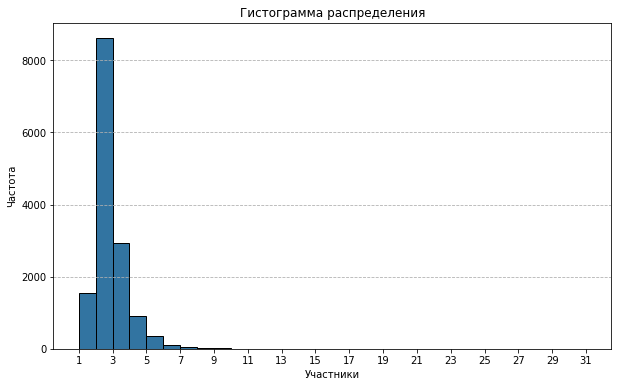

In [30]:
# Построение гистограммы
plt.figure(figsize=(10, 6))

plt.hist(df['participants_count'], bins=range(1, 32), color="#3274A1",edgecolor="k")
plt.title('Гистограмма распределения')
plt.xlabel('Участники')
plt.xticks(range(1, 32, 2))
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--')
plt.show()

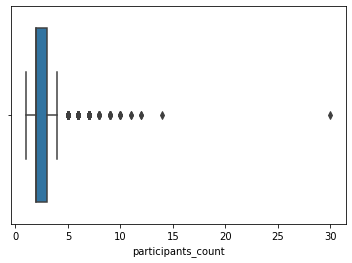

In [31]:
#Анализ и выбросы данных
sns.boxplot(data=df,
                    x='participants_count'
                    )
plt.show()

<font color='#7030a0'> Промежуточные выводы:

Большинство ДТП (от 25% до 75%) включают 2–3 участника, что может быть стандартным случаем для столкновений или взаимодействия между несколькими транспортными средствами.
- Случаи с 30 участниками — это явные выбросы, так как такие аварии встречаются крайне редко. Их стоит дополнительно проанализировать: это могут быть массовые столкновения на дороге или ошибки в данных.
- Распределение вероятнее всего асимметрично, так как максимальное значение (30) значительно превышает медиану (2).
    
</font>

### Предположите,  между какими столбцами в данных высокая корреляция? Проверьте своё предположение.

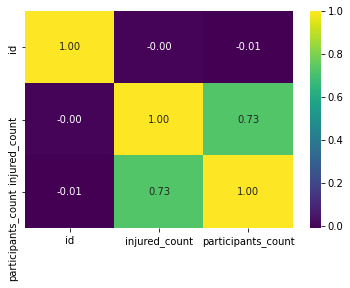

In [32]:
# Проверка корреляции в числовых данных
df_numeric=df.select_dtypes(include=['number'])
correlation_matrix=df_numeric.corr()
#Построим тепловую карту
sns.heatmap(correlation_matrix,
            annot=True,
           fmt='.2f',
           cmap='viridis',
           cbar=True)
plt.show()

<font color='#7030a0'> Промежуточные выводы:
    
Сильная связь между количеством участников (participants_count) и количеством пострадавших (injured_count) указывает на то, что в ДТП с большим количеством участников чаще бывает больше пострадавших.
</font>    

### Как связаны категории аварий и погодные условия?

In [33]:
display(f"Всего количество аварий: {df['id'].shape[0]}")

'Всего количество аварий: 14517'

In [34]:
unique_combinations = df[['weather', 'category']].value_counts()
display(unique_combinations)

weather                                category             
['Пасмурно']                           Столкновение             2514
['Ясно']                               Столкновение             2288
['Пасмурно']                           Наезд на пешехода        2268
['Ясно']                               Наезд на пешехода        1572
                                       Съезд с дороги            586
                                                                ... 
['Ясно', 'Температура выше +30С']      Падение пассажира           1
['Пасмурно', 'Температура ниже -30С']  Падение пассажира           1
['Снегопад']                           Отбрасывание предмета       1
['Ясно', 'Температура ниже -30С']      Наезд на стоящее ТС         1
['Пасмурно']                           Падение груза               1
Length: 115, dtype: int64

*Встречаются строки, в которых указан целый список различных погодных явлений. В таком случае можно посмотреть на общее число ДТП по категориям.*

In [35]:
#Выделим топ 5 категорий ДТП
C_group=df.groupby('category').agg({'id':'count'})
C_group_sorted=C_group.sort_values(by='id',ascending=False)
C_group_filtered=C_group_sorted.head(5)
print(C_group_filtered)

                     id
category               
Столкновение       5423
Наезд на пешехода  4364
Съезд с дороги     1155
Опрокидывание      1002
Падение пассажира   738


*Дополним информацию погодными условиями*

In [36]:
#Выделим топ 5 категорий ДТП
CW_group=df.groupby(['category','weather']).agg({'id':'count'})
CW_group_sorted=CW_group.sort_values(by='id',ascending=False)
CW_group_filtered=CW_group_sorted.head(5)
print(CW_group_filtered)

                                  id
category          weather           
Столкновение      ['Пасмурно']  2514
                  ['Ясно']      2288
Наезд на пешехода ['Пасмурно']  2268
                  ['Ясно']      1572
Съезд с дороги    ['Ясно']       586


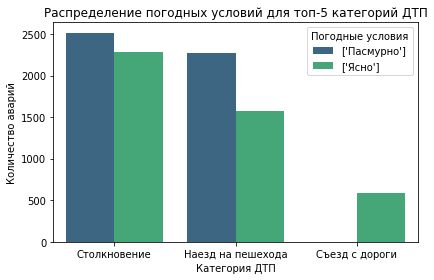

In [37]:
#Добавим визуализацию
sns.barplot(data=CW_group_filtered.reset_index(),
            x='category',
            y='id',
            hue='weather',
            palette="viridis")


plt.title("Распределение погодных условий для топ-5 категорий ДТП")
plt.xlabel("Категория ДТП")
plt.ylabel("Количество аварий")

plt.legend(title="Погодные условия")
plt.tight_layout()

plt.show()

<font color='#7030a0'> Промежуточные выводы:

- В топ 5 проишествий входит 63% от всех аварий(9226 vs 14517) 
- Пасмурная погода как фактор риска: Большинство аварий происходит при пасмурной погоде, особенно в категориях "Столкновение" и "Наезд на пешехода".
- Ясная погода и высокая скорость: На ясной погоде чаще фиксируются ДТП, связанные со съездом с дороги, что может быть связано с повышенной скоростью на сухом дорожном покрытии.
- Приоритет в профилактике: Меры по снижению аварийности должны учитывать влияние погодных условий, уделяя особое внимание пасмурным дням и категориям "Столкновение" и "Наезд на пешехода".
    
</font>    

### Постройте процентную разбивку аварий по видам освещённости. При этом учитывайте пол участника и сделайте расчёты для мужчин и женщин отдельно.

*Важно проверить, не встречается ли в данных дубликатов. Узнаем, есть ли водители, которые указаны в данных несколько раз.*

In [38]:
df_p.query('role == "Водитель"')['id'].value_counts()

1984910    6
1985567    6
1984276    6
2649405    6
1983117    5
          ..
1982001    1
1986095    1
1984046    1
2973229    1
2754559    1
Name: id, Length: 13025, dtype: int64

In [39]:
display(f'Количество строк до удаления:{df_p.shape[0]}')
df_p=df_p.drop_duplicates(subset='id')
display(f'Количество строк после удаления:{df_p.shape[0]}')        

'Количество строк до удаления:19753'

'Количество строк после удаления:13025'

In [40]:
df_res = df_p.merge(df, on = 'id')

In [41]:
#Проверка данных до и после объединения и удаления
display(f'Количсетво строк в датасете Kirovskaya_oblast: {df.shape[0]}')
display(f'Количсетво строк в датасете Kirovskaya_oblast_participiants: {df_p.shape[0]}')
display(f'Количество строк в объединенном датасете:{df_res.shape[0]}')

'Количсетво строк в датасете Kirovskaya_oblast: 14517'

'Количсетво строк в датасете Kirovskaya_oblast_participiants: 13025'

'Количество строк в объединенном датасете:13025'

In [42]:
# ДТП по типу освещенности
l_group = df_res.groupby('light').agg(
    total_count=('id', 'count')  # Общее количество
)

# Добавление доли для каждого типа освещенности
l_group['share'] = (l_group['total_count'] / l_group['total_count'].sum()) * 100

# Сортировка по общему количеству
l_group_sorted = l_group.sort_values(by='total_count', ascending=False)

display(l_group_sorted)


,total_count,share
light,,
Светлое время суток,8298,63.708253
"В темное время суток, освещение включено",2860,21.957774
"В темное время суток, освещение отсутствует",1276,9.796545
Сумерки,403,3.094050
"В темное время суток, освещение не включено",188,1.443378


In [43]:
m_filter=df_res[df_res['gender']=='Мужской']
# ДТП по типу освещенности
ml_group = m_filter.groupby('light').agg(
    total_count=('id', 'count')  # Общее количество
)

# Добавление доли для каждого типа освещенности
ml_group['share'] = (ml_group['total_count'] / ml_group['total_count'].sum()) * 100

# Сортировка по общему количеству
ml_group_sorted = ml_group.sort_values(by='total_count', ascending=False)

display(ml_group_sorted)

,total_count,share
light,,
Светлое время суток,6905,63.658154
"В темное время суток, освещение включено",2372,21.867798
"В темное время суток, освещение отсутствует",1067,9.836821
Сумерки,339,3.125288
"В темное время суток, освещение не включено",164,1.511939


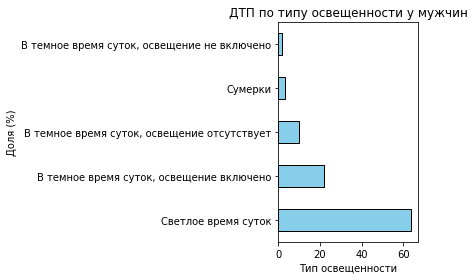

In [44]:
# Визуализация
ml_group_sorted['share'].plot(kind='barh', title="ДТП по типу освещенности у мужчин", color='skyblue', edgecolor='black')

plt.xlabel("Тип освещенности")
plt.ylabel("Доля (%)")
plt.tight_layout()  # Для корректного отображения
plt.show()

In [45]:
w_filter=df_res[df_res['gender']=='Женский']
# ДТП по типу освещенности
wl_group = w_filter.groupby('light').agg(
    total_count=('id', 'count')  # Общее количество
)

# Добавление доли для каждого типа освещенности
wl_group['share'] = (wl_group['total_count'] / wl_group['total_count'].sum()) * 100

# Сортировка по общему количеству
wl_group_sorted = wl_group.sort_values(by='total_count', ascending=False)

display(wl_group_sorted)

,total_count,share
light,,
Светлое время суток,1096,64.243845
"В темное время суток, освещение включено",376,22.039859
"В темное время суток, освещение отсутствует",168,9.847597
Сумерки,48,2.813599
"В темное время суток, освещение не включено",18,1.055100


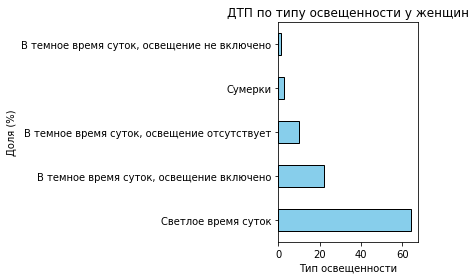

In [46]:
# Визуализация
wl_group_sorted['share'].plot(kind='barh', title="ДТП по типу освещенности у женщин", color='skyblue', edgecolor='black')

plt.xlabel("Тип освещенности")
plt.ylabel("Доля (%)")
plt.tight_layout()  # Для корректного отображения
plt.show()

<font color='#7030a0'> Промежуточные выводы:

- Видим близкие относительные значения вне зависимости от пола. При этом для обоих полов характерно наибольшее число аварий в светлое время суток.
    
</font>    

### Исследуйте, чем отличаются аварии без пострадавших от тех, в которых был один пострадавший или более.

In [47]:
df_res['injured_count'].value_counts()


1     10445
2      1711
3       540
4       212
5        72
6        26
7        10
8         4
9         2
10        1
12        1
30        1
Name: injured_count, dtype: int64

In [48]:
df_res['health_status'].unique()

array(['Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара',
       'Не пострадал',
       'Раненый, находящийся (находившийся) на стационарном лечении',
       'Раненый, находящийся (находившийся)  на амбулаторном лечении, либо которому по характеру полученных травм обозначена необходимость амбулаторного лечения (вне зависимости от его фактического прохождения)',
       'Получил телесные повреждения с показанием к лечению в медицинских организациях (кроме разовой медицинской помощи)',
       nan,
       'Получил травмы с оказанием разовой медицинской помощи, к категории раненый не относится',
       'Получил телесные повреждения с показанием к лечению в медицинских организациях, фактически лечение не проходил, к категории раненый не относится'],
      dtype=object)

*Оставим только пострадавших*

In [49]:
# Преобразуем данные в колонке hours  в новый столбец
def categorize(row):
    if pd.isna(row):
        return False
    elif 'Не пострадал' in row:
        return False
    else:
        return True

# Применяем функцию к колонке 
df_res['injured'] = df_res['health_status'].apply(categorize)

# Печатаем результат
display(df_res[['injured', 'health_status']].head())

,injured,health_status
0,True,"Раненый, находящийся (находившийся) на амбулат..."
1,False,Не пострадал
2,False,Не пострадал
3,True,"Раненый, находящийся (находившийся) на стацион..."
4,False,Не пострадал


*Напишем цикл для генерации таблиц и графиков по раличным факторам*

injured,False,True
light,,
"В темное время суток, освещение включено",0.744464,0.255536
"В темное время суток, освещение не включено",0.648783,0.351217
"В темное время суток, освещение отсутствует",0.658841,0.341159
Светлое время суток,0.698355,0.301645
Сумерки,0.658636,0.341364


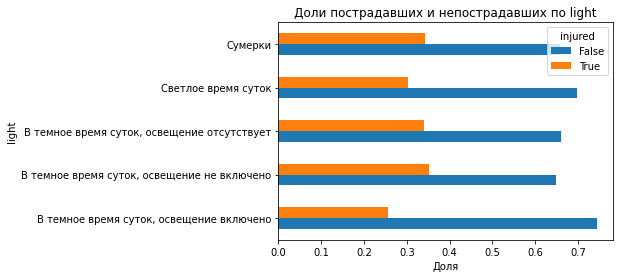

injured,False,True
gender,,
Женский,0.612894,0.387106
Мужской,0.706663,0.293337


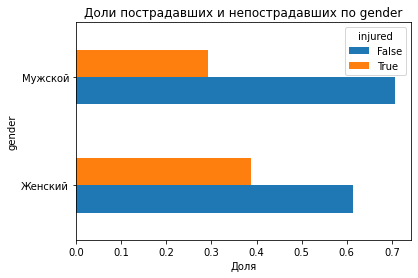

injured,False,True
category,,
Иной вид ДТП,0.687357,0.312643
Наезд на велосипедиста,0.701745,0.298255
Наезд на внезапно возникшее препятствие,1.000000,NaN
Наезд на животное,0.660904,0.339096
"Наезд на лицо, не являющееся участником дорожного движения, осуществляющее какую-либо другую деятельность",0.500857,0.499143
"Наезд на лицо, не являющееся участником дорожного движения, осуществляющее несение службы",0.593981,0.406019
"Наезд на лицо, не являющееся участником дорожного движения, осуществляющее производство работ",0.775413,0.224587
Наезд на пешехода,0.720636,0.279364
Наезд на препятствие,0.684722,0.315278


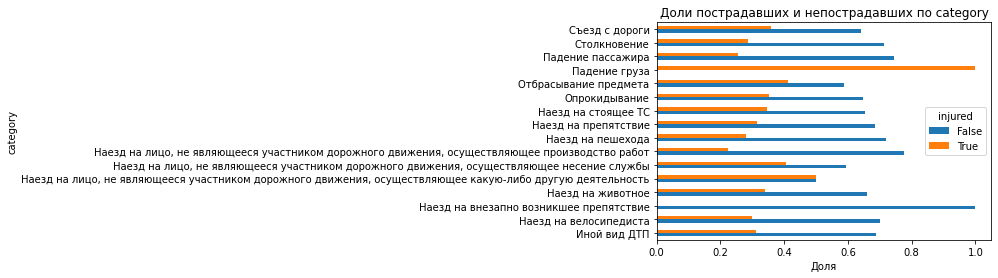

In [59]:
# Список колонок, по которым нужно создать сводные таблицы
columns_list = ['light', 'gender', 'category']

# Цикл по каждой колонке из списка
for column in columns_list:
    # Создаем сводную таблицу
    pivot_injured = pd.pivot_table(
        df_res,
        values='id',
        columns='injured',
        index=column,
        aggfunc='sum'
    )

    # Сортируем таблицу по сумме (по индексу или по колонке)
    pivot_injured_sorted = pivot_injured.sort_values(by=column, ascending=True)  # Сортируем по индексу (по колонке)

    # Преобразуем значения в относительные (доли)
    pivot_injured_relative = pivot_injured_sorted.div(pivot_injured_sorted.sum(axis=1), axis=0)

    # Отображаем результат
    display(pivot_injured_relative)

    # Строим горизонтальный график
    pivot_injured_relative.plot(kind='barh', stacked=False)  
    plt.title(f"Доли пострадавших и непострадавших по {column}")
    plt.xlabel("Доля")  
    plt.show()

<font color='#7030a0'> Промежуточные выводы:

- Анализ данных о ДТП и пострадавших (True) показывает, что в темное время суток, независимо от наличия освещения, доля пострадавших (True) выше, чем в светлое время суток, с максимальной долей в условиях, когда освещение не включено (0.35). В целом, в условиях темного времени суток и отсутствия освещения риск пострадать выше, чем при хорошем освещении (0.25 в темном и 0.30 в светлом времени суток). 
- Что касается пола участников, мужчины чаще вовлечены в ДТП, но доля пострадавших среди них ниже, чем среди женщин (0.29 против 0.39). 
- Среди категорий ДТП наиболее высокая доля пострадавших наблюдается в таких случаях, как падение груза (100%), отбрасывание предмета (0.41) и наезд на лицо, не являющееся участником дорожного движения, осуществляющее другую деятельность (0.50). В то время как наезд на пешехода и велосипедиста показывает более низкую долю пострадавших (0.28 и 0.30 соответственно).

### Сделайте общий вывод о связи аварийности с другими факторами. Какие рекомендации вы можете дать заказчику?

Анализ аварийности показывает, что наибольшее количество ДТП происходит в летние месяцы и в пятницу, а также в темное время суток и при отсутствии освещения, что увеличивает риск пострадать. Мужчины чаще становятся участниками аварий, но женщины имеют более высокую долю пострадавших. Аварии чаще происходят в пасмурную погоду, особенно в категориях "Столкновение" и "Наезд на пешехода". Рекомендуется усилить меры безопасности в темное время суток, при отсутствии освещения и в пасмурную погоду, а также учитывать стаж водителей для более точного анализа аварийности.